In [1]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


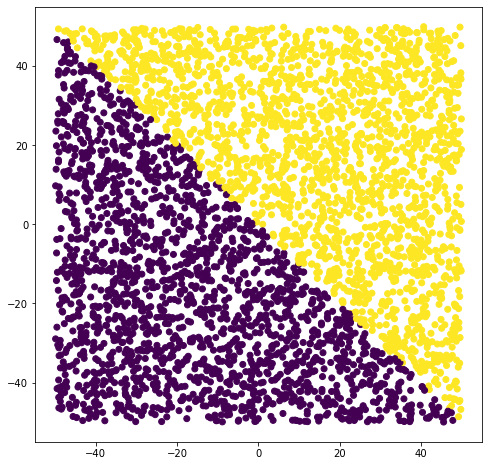

In [2]:
%run nonlinear_function.py

TYPE=3

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show
np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 1.0
[24.89066375 15.35698709] 1.0
[24.77148093 46.13067361] 1.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 1.0
[46.46475974 22.36853469] 1.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

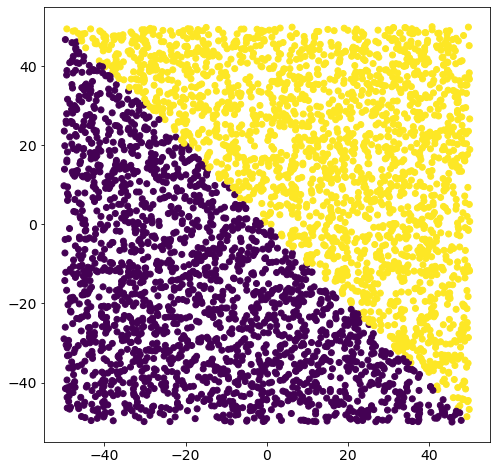

In [4]:
#keras work with numpy arrays: just use them from the start
TYPE=3
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [5]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [6]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.09854886 -1.02696928]
 [ 0.23239757  0.32886942]
 [ 1.60836682  0.52872451]
 ...
 [-1.71033821 -0.58010476]
 [ 0.45209286 -0.58910521]
 [ 1.55988736  0.94632066]]


In [7]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='tanh'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dense(30,activation='relu'))
    model.add(Dropout(0.6))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=500
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 30)                90        
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 3

In [8]:
model.compile(loss='binary_crossentropy',
               #optimizer="RMSprop",
               optimizer='adam',
               metrics=['accuracy'])

In [9]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 90,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/500
36/36 - 1s - loss: 0.6651 - accuracy: 0.7378 - val_loss: 0.5888 - val_accuracy: 0.9588 - 874ms/epoch - 24ms/step
Epoch 2/500
36/36 - 0s - loss: 0.4241 - accuracy: 0.9400 - val_loss: 0.1847 - val_accuracy: 0.9850 - 107ms/epoch - 3ms/step
Epoch 3/500
36/36 - 0s - loss: 0.1447 - accuracy: 0.9509 - val_loss: 0.0414 - val_accuracy: 0.9925 - 107ms/epoch - 3ms/step
Epoch 4/500
36/36 - 0s - loss: 0.0694 - accuracy: 0.9634 - val_loss: 0.0293 - val_accuracy: 0.9862 - 115ms/epoch - 3ms/step
Epoch 5/500
36/36 - 0s - loss: 0.0515 - accuracy: 0.9697 - val_loss: 0.0212 - val_accuracy: 0.9887 - 105ms/epoch - 3ms/step
Epoch 6/500
36/36 - 0s - loss: 0.0464 - accuracy: 0.9712 - val_loss: 0.0120 - val_accuracy: 0.9975 - 109ms/epoch - 3ms/step
Epoch 7/500
36/36 - 0s - loss: 0.0392 - accuracy: 0.9891 - val_loss: 0.0112 - val_accuracy: 0.9950 - 108ms/epoch - 3ms/step
Epoch 8/500
36/36 - 0s - loss: 0.0389 - accuracy: 0.9881 - val_loss: 0.0104 - val_accuracy: 0.9950 - 102ms/epoch - 3ms/step
Epoch 9

Epoch 67/500
36/36 - 0s - loss: 0.0139 - accuracy: 0.9962 - val_loss: 0.0461 - val_accuracy: 0.9900 - 106ms/epoch - 3ms/step
Epoch 68/500
36/36 - 0s - loss: 0.0148 - accuracy: 0.9978 - val_loss: 0.0479 - val_accuracy: 0.9887 - 108ms/epoch - 3ms/step
Epoch 69/500
36/36 - 0s - loss: 0.0131 - accuracy: 0.9978 - val_loss: 0.0403 - val_accuracy: 0.9912 - 105ms/epoch - 3ms/step
Epoch 70/500
36/36 - 0s - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.0763 - val_accuracy: 0.9837 - 108ms/epoch - 3ms/step
Epoch 71/500
36/36 - 0s - loss: 0.0134 - accuracy: 0.9969 - val_loss: 0.0611 - val_accuracy: 0.9862 - 103ms/epoch - 3ms/step
Epoch 72/500
36/36 - 0s - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0364 - val_accuracy: 0.9912 - 100ms/epoch - 3ms/step
Epoch 73/500
36/36 - 0s - loss: 0.0128 - accuracy: 0.9972 - val_loss: 0.0425 - val_accuracy: 0.9900 - 104ms/epoch - 3ms/step
Epoch 74/500
36/36 - 0s - loss: 0.0148 - accuracy: 0.9975 - val_loss: 0.0279 - val_accuracy: 0.9900 - 107ms/epoch - 3ms/step


Epoch 133/500
36/36 - 0s - loss: 0.0088 - accuracy: 0.9969 - val_loss: 0.0794 - val_accuracy: 0.9862 - 106ms/epoch - 3ms/step
Epoch 134/500
36/36 - 0s - loss: 0.0092 - accuracy: 0.9956 - val_loss: 0.0745 - val_accuracy: 0.9862 - 106ms/epoch - 3ms/step
Epoch 135/500
36/36 - 0s - loss: 0.0076 - accuracy: 0.9969 - val_loss: 0.0641 - val_accuracy: 0.9887 - 99ms/epoch - 3ms/step
Epoch 136/500
36/36 - 0s - loss: 0.0073 - accuracy: 0.9978 - val_loss: 0.0743 - val_accuracy: 0.9875 - 102ms/epoch - 3ms/step
Epoch 137/500
36/36 - 0s - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0705 - val_accuracy: 0.9875 - 105ms/epoch - 3ms/step
Epoch 138/500
36/36 - 0s - loss: 0.0148 - accuracy: 0.9956 - val_loss: 0.0364 - val_accuracy: 0.9912 - 103ms/epoch - 3ms/step
Epoch 139/500
36/36 - 0s - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0846 - val_accuracy: 0.9862 - 103ms/epoch - 3ms/step
Epoch 140/500
36/36 - 0s - loss: 0.0110 - accuracy: 0.9956 - val_loss: 0.0606 - val_accuracy: 0.9862 - 105ms/epoch - 3m

36/36 - 0s - loss: 0.0110 - accuracy: 0.9959 - val_loss: 0.0629 - val_accuracy: 0.9875 - 105ms/epoch - 3ms/step
Epoch 199/500
36/36 - 0s - loss: 0.0113 - accuracy: 0.9956 - val_loss: 0.1033 - val_accuracy: 0.9787 - 107ms/epoch - 3ms/step
Epoch 200/500
36/36 - 0s - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0400 - val_accuracy: 0.9912 - 98ms/epoch - 3ms/step
Epoch 201/500
36/36 - 0s - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0531 - val_accuracy: 0.9900 - 97ms/epoch - 3ms/step
Epoch 202/500
36/36 - 0s - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.0485 - val_accuracy: 0.9900 - 105ms/epoch - 3ms/step
Epoch 203/500
36/36 - 0s - loss: 0.0097 - accuracy: 0.9953 - val_loss: 0.0666 - val_accuracy: 0.9887 - 104ms/epoch - 3ms/step
Epoch 204/500
36/36 - 0s - loss: 0.0085 - accuracy: 0.9969 - val_loss: 0.0632 - val_accuracy: 0.9900 - 107ms/epoch - 3ms/step
Epoch 205/500
36/36 - 0s - loss: 0.0033 - accuracy: 0.9991 - val_loss: 0.0734 - val_accuracy: 0.9875 - 128ms/epoch - 4ms/step
Epoch 20

Epoch 264/500
36/36 - 0s - loss: 0.0075 - accuracy: 0.9969 - val_loss: 0.0670 - val_accuracy: 0.9887 - 112ms/epoch - 3ms/step
Epoch 265/500
36/36 - 0s - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0509 - val_accuracy: 0.9887 - 106ms/epoch - 3ms/step
Epoch 266/500
36/36 - 0s - loss: 0.0141 - accuracy: 0.9947 - val_loss: 0.0476 - val_accuracy: 0.9900 - 103ms/epoch - 3ms/step
Epoch 267/500
36/36 - 0s - loss: 0.0096 - accuracy: 0.9966 - val_loss: 0.0444 - val_accuracy: 0.9900 - 108ms/epoch - 3ms/step
Epoch 268/500
36/36 - 0s - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.0487 - val_accuracy: 0.9900 - 112ms/epoch - 3ms/step
Epoch 269/500
36/36 - 0s - loss: 0.0078 - accuracy: 0.9972 - val_loss: 0.0502 - val_accuracy: 0.9900 - 106ms/epoch - 3ms/step
Epoch 270/500
36/36 - 0s - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.0703 - val_accuracy: 0.9875 - 169ms/epoch - 5ms/step
Epoch 271/500
36/36 - 0s - loss: 0.0081 - accuracy: 0.9962 - val_loss: 0.1104 - val_accuracy: 0.9825 - 126ms/epoch - 3

36/36 - 0s - loss: 0.0069 - accuracy: 0.9975 - val_loss: 0.0426 - val_accuracy: 0.9900 - 111ms/epoch - 3ms/step
Epoch 330/500
36/36 - 0s - loss: 0.0092 - accuracy: 0.9959 - val_loss: 0.0514 - val_accuracy: 0.9900 - 108ms/epoch - 3ms/step
Epoch 331/500
36/36 - 0s - loss: 0.0063 - accuracy: 0.9975 - val_loss: 0.0601 - val_accuracy: 0.9900 - 104ms/epoch - 3ms/step
Epoch 332/500
36/36 - 0s - loss: 0.0072 - accuracy: 0.9972 - val_loss: 0.0565 - val_accuracy: 0.9900 - 109ms/epoch - 3ms/step
Epoch 333/500
36/36 - 0s - loss: 0.0073 - accuracy: 0.9972 - val_loss: 0.0595 - val_accuracy: 0.9900 - 107ms/epoch - 3ms/step
Epoch 334/500
36/36 - 0s - loss: 0.0079 - accuracy: 0.9972 - val_loss: 0.0835 - val_accuracy: 0.9875 - 115ms/epoch - 3ms/step
Epoch 335/500
36/36 - 0s - loss: 0.0058 - accuracy: 0.9981 - val_loss: 0.0623 - val_accuracy: 0.9900 - 118ms/epoch - 3ms/step
Epoch 336/500
36/36 - 0s - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.0565 - val_accuracy: 0.9900 - 106ms/epoch - 3ms/step
Epoch 

Epoch 395/500
36/36 - 0s - loss: 0.0078 - accuracy: 0.9962 - val_loss: 0.0974 - val_accuracy: 0.9837 - 111ms/epoch - 3ms/step
Epoch 396/500
36/36 - 0s - loss: 0.0039 - accuracy: 0.9984 - val_loss: 0.0898 - val_accuracy: 0.9837 - 111ms/epoch - 3ms/step
Epoch 397/500
36/36 - 0s - loss: 0.0032 - accuracy: 0.9994 - val_loss: 0.0844 - val_accuracy: 0.9875 - 108ms/epoch - 3ms/step
Epoch 398/500
36/36 - 0s - loss: 0.0061 - accuracy: 0.9975 - val_loss: 0.1130 - val_accuracy: 0.9850 - 109ms/epoch - 3ms/step
Epoch 399/500
36/36 - 0s - loss: 0.0110 - accuracy: 0.9975 - val_loss: 0.0805 - val_accuracy: 0.9862 - 109ms/epoch - 3ms/step
Epoch 400/500
36/36 - 0s - loss: 0.0065 - accuracy: 0.9978 - val_loss: 0.0744 - val_accuracy: 0.9887 - 107ms/epoch - 3ms/step
Epoch 401/500
36/36 - 0s - loss: 0.0075 - accuracy: 0.9959 - val_loss: 0.0793 - val_accuracy: 0.9862 - 104ms/epoch - 3ms/step
Epoch 402/500
36/36 - 0s - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0581 - val_accuracy: 0.9900 - 127ms/epoch - 4

36/36 - 0s - loss: 0.0058 - accuracy: 0.9972 - val_loss: 0.0667 - val_accuracy: 0.9837 - 104ms/epoch - 3ms/step
Epoch 461/500
36/36 - 0s - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.0614 - val_accuracy: 0.9850 - 113ms/epoch - 3ms/step
Epoch 462/500
36/36 - 0s - loss: 0.0054 - accuracy: 0.9975 - val_loss: 0.0476 - val_accuracy: 0.9900 - 113ms/epoch - 3ms/step
Epoch 463/500
36/36 - 0s - loss: 0.0064 - accuracy: 0.9972 - val_loss: 0.0516 - val_accuracy: 0.9900 - 107ms/epoch - 3ms/step
Epoch 464/500
36/36 - 0s - loss: 0.0049 - accuracy: 0.9978 - val_loss: 0.0661 - val_accuracy: 0.9862 - 106ms/epoch - 3ms/step
Epoch 465/500
36/36 - 0s - loss: 0.0029 - accuracy: 0.9987 - val_loss: 0.0788 - val_accuracy: 0.9850 - 104ms/epoch - 3ms/step
Epoch 466/500
36/36 - 0s - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.0754 - val_accuracy: 0.9862 - 108ms/epoch - 3ms/step
Epoch 467/500
36/36 - 0s - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.0644 - val_accuracy: 0.9900 - 106ms/epoch - 3ms/step
Epoch 

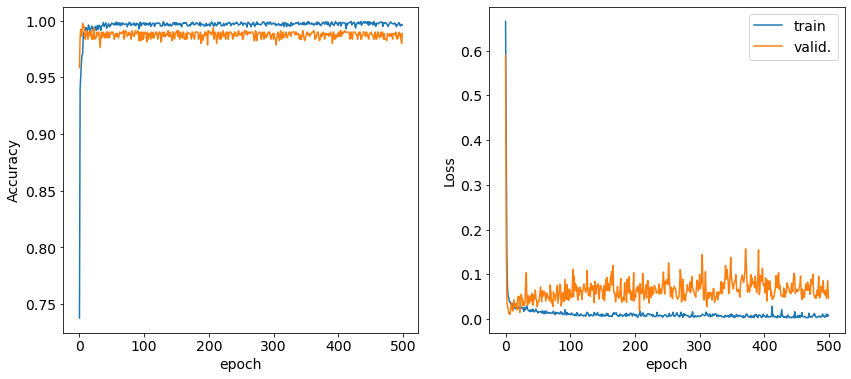

In [10]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()

In [11]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
pred = model.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show(close=None, block=None)>

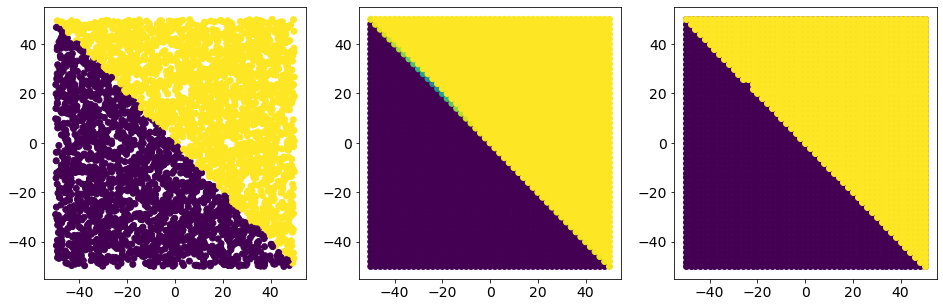

In [12]:
    
def boundaries():  
    x=np.linspace(-np.sqrt((np.pi**2)),np.sqrt((np.pi**2)),4000)
    ax.plot(x,f(x),c="r")
    ax.plot(x,-f(x),c="r")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
#boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
#boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
#boundaries()
plt.show
plt.show